Project-2 Credit Card Fraud Detection Neural Network Model using pytorch

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
data = pd.read_excel('CreditCardDataset.xlsx')

data.sample(10) #Display random 10 values from dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
35888,123257,-0.752154,1.656833,-2.514662,0.037909,3.294335,3.339357,0.586347,1.216439,-0.847818,...,0.024531,0.264380,-0.157621,0.584646,0.168570,-0.346287,0.476634,0.253800,30.00,0
53093,160955,2.004927,-0.168802,-1.027683,0.320840,-0.172520,-0.873308,0.009342,-0.117965,0.406110,...,-0.236434,-0.618338,0.355789,-0.005876,-0.384012,0.181337,-0.076850,-0.071773,1.29,0
27381,81399,0.424393,-1.744141,-0.072680,1.082240,-1.143307,0.001067,0.190040,-0.105065,-0.702452,...,-0.205323,-0.921305,-0.359686,0.041237,0.365867,-0.355095,-0.022015,0.095783,449.00,0
24960,77043,-1.782361,0.642252,1.280182,0.003775,0.319778,-0.494000,-0.015366,-1.600609,-0.457203,...,1.196019,-0.850909,0.822695,0.302993,0.008997,0.098534,0.456911,-0.031251,2.58,0
48303,150149,-0.638252,0.515673,0.634504,-0.621570,-0.224309,0.209074,-0.446555,0.616047,0.405301,...,0.385414,1.073698,0.066417,0.753328,-0.496375,0.054439,-0.281366,0.034204,1.87,0
32797,115053,-1.873523,2.194977,-2.901972,-2.673483,3.354043,2.661226,1.242948,0.466664,1.242552,...,-0.107914,0.690709,-0.171935,0.721457,0.086327,0.062345,0.628559,0.040171,3.70,0
36663,125052,1.797709,-0.830647,-0.297091,0.222412,-1.031669,-0.409842,-0.696759,0.099085,1.386482,...,0.272134,0.790173,0.080456,0.099576,-0.271906,0.095037,-0.007802,-0.039973,83.44,0
15857,57286,1.060742,-2.069053,-1.162146,-2.307369,0.564431,3.437917,-1.311754,0.752512,-1.913208,...,-0.265392,-1.145263,-0.083821,0.960470,0.198933,-0.422413,-0.002747,0.068007,270.50,0
11154,46674,-0.971824,1.041226,2.830609,0.941151,-0.696269,0.699154,-0.320190,0.527665,-0.173941,...,0.319040,1.161877,-0.289422,0.232669,0.129387,-0.034987,0.511927,0.205878,8.49,0
27753,82282,1.316737,-0.031374,-1.089211,-0.557648,2.030612,3.267881,-0.535909,0.808429,-0.052643,...,-0.313726,-1.068570,0.104405,0.992090,0.369652,0.110447,-0.028172,0.011716,1.29,0


In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [10]:
data.info()
print('---------------------value count--------------------------')
print(data['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

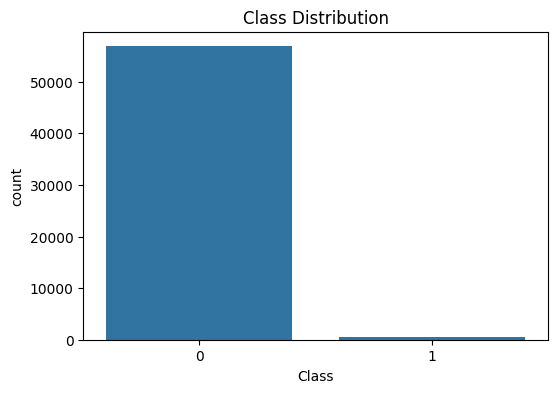

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

As seeing from the value counts and graph above, there is a huge imbalance in classes. There are 56863 values belonging to class 1 whereas just 492 values belonging to class 1.

In [12]:
# check for null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values found

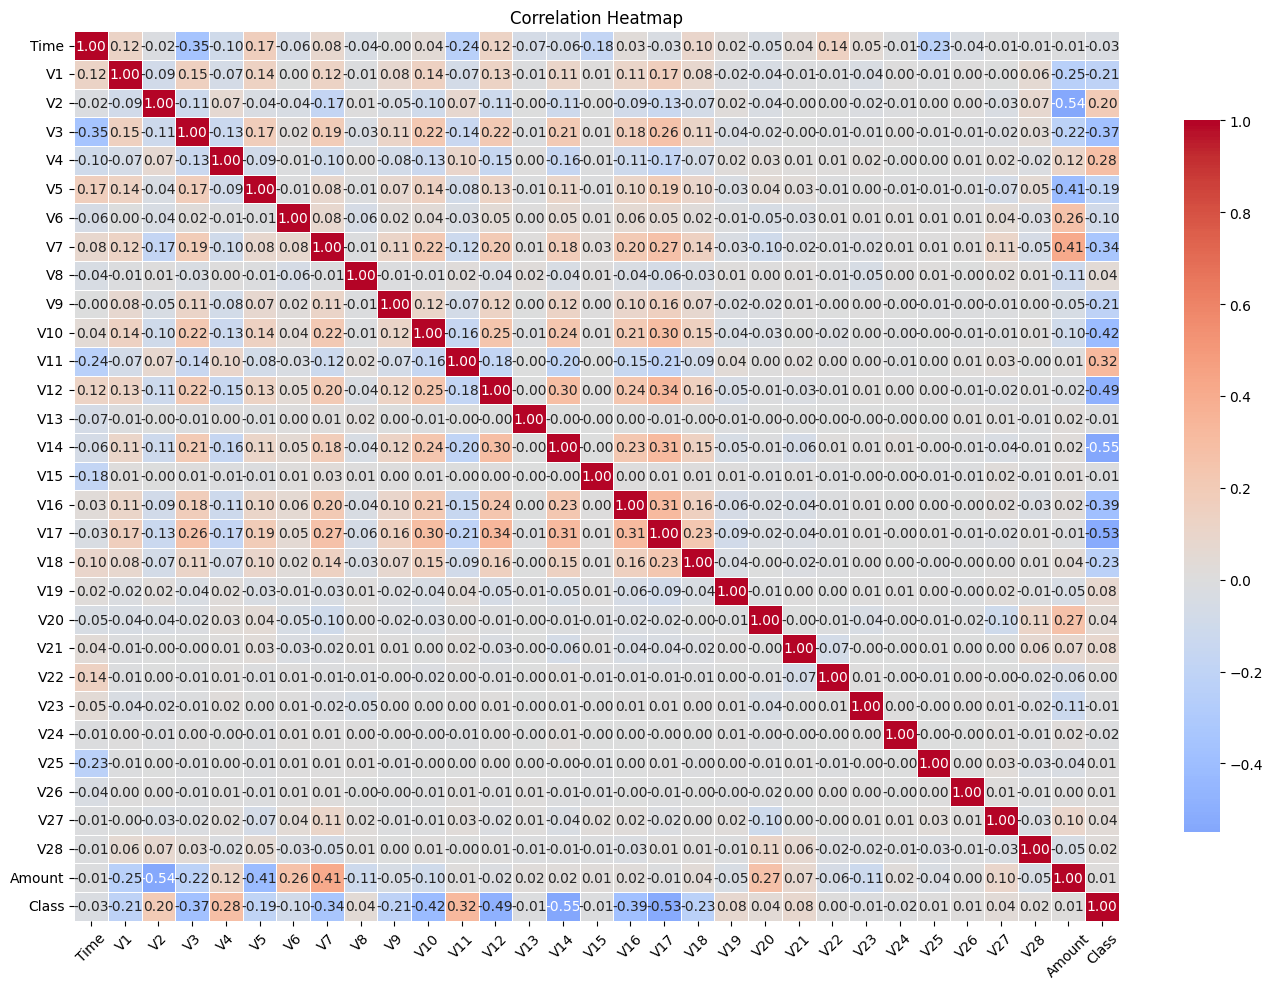

In [13]:
# Calculating correlation matrix with heatmap
corrMatrix = data.corr()

fig, ax = plt.subplots(figsize=(14, 10))
HeatMapVis = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(corrMatrix, cmap=HeatMapVis, center=0, linewidths=0.5, annot=True, fmt=".2f", ax=ax, cbar_kws={"shrink": 0.8})

ax.set_title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

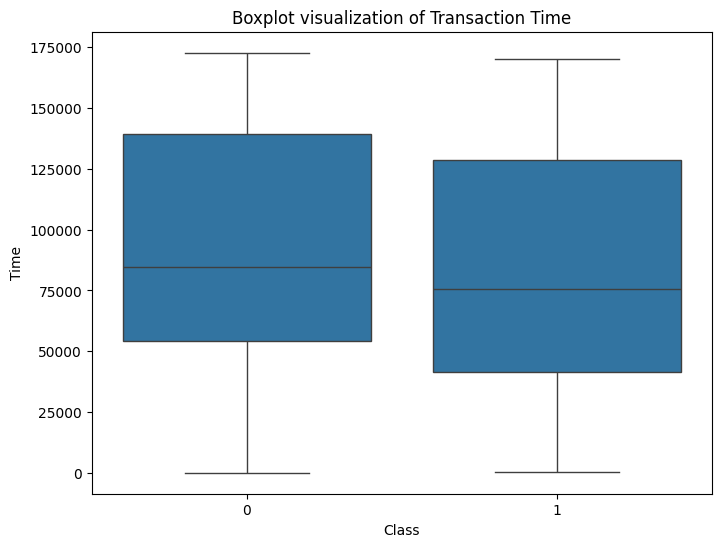

In [14]:
# Boxplot visualization for transaction time for all the classes
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Class', y = 'Time', data=data)
plt.xlabel('Class')
plt.ylabel('Time')
plt.title('Boxplot visualization of Transaction Time')
plt.show()

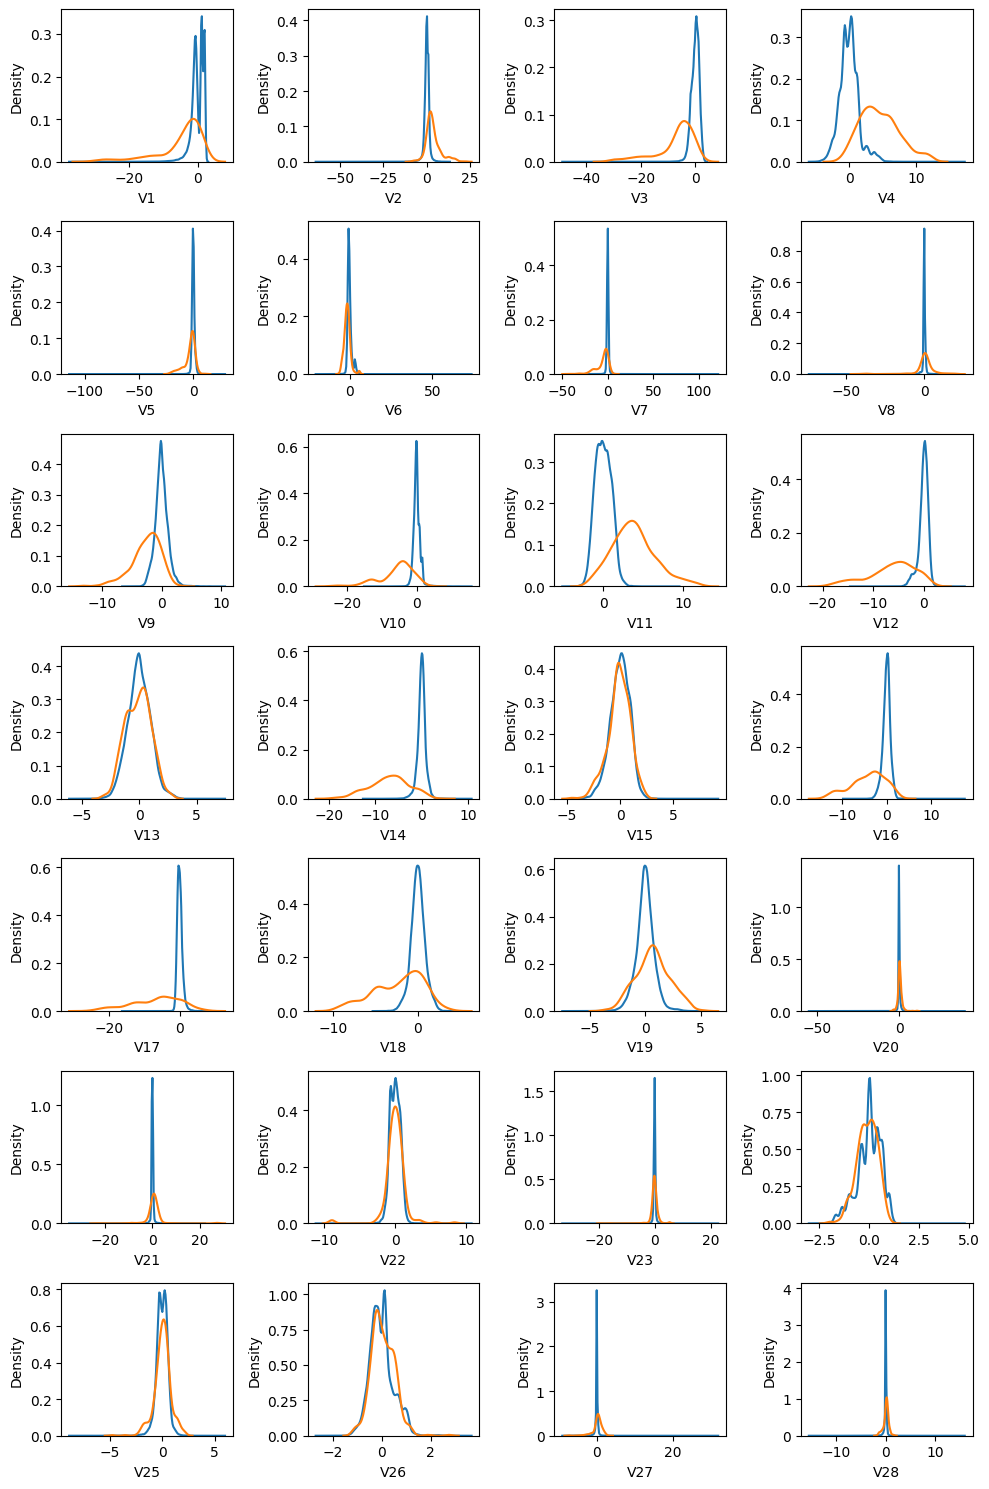

In [15]:
# Plot distributions of features for fraud and non-fraudulent classes
features = data.columns[1:29]

plt.figure(figsize=(10, 15))
for i, feature in enumerate(features):
    plt.subplot(7, 4, i + 1)
    sns.kdeplot(data[data['Class'] == 0][feature], label='Non Fraudulent Class')
    sns.kdeplot(data[data['Class'] == 1][feature], label='Fraudulent Class')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

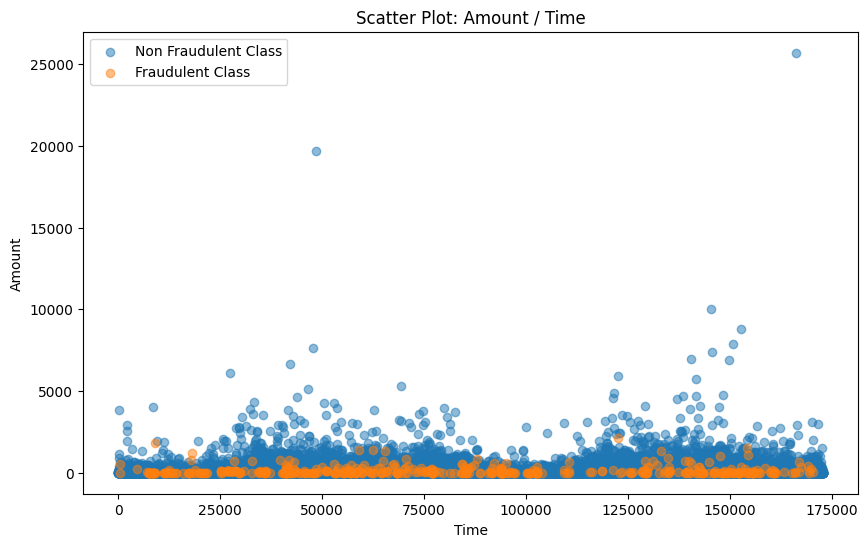

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Class'] == 0]['Time'], data[data['Class'] == 0]['Amount'], label='Non Fraudulent Class', alpha=0.5)
plt.scatter(data[data['Class'] == 1]['Time'], data[data['Class'] == 1]['Amount'], label='Fraudulent Class', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Scatter Plot: Amount / Time')
plt.legend()
plt.show()

In [17]:
# Handle class imbalance
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]
fraud_upsampled = resample(fraud, replace=True, n_samples=len(non_fraud), random_state=42)
data_balanced = pd.concat([non_fraud, fraud_upsampled])
print('Count of upsampled class distribution of fraud class:', fraud_upsampled.shape[0])
print('Count of total data:', data_balanced.shape[0])

Count of upsampled class distribution of fraud class: 56863
Count of total data: 113726


In [18]:
# Split data into features and labels
X = data_balanced.drop('Class', axis=1)
y = data_balanced['Class']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
class FraudDetectionNN(nn.Module):
    def __init__(self):
        super(FraudDetectionNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = FraudDetectionNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [20]:
epochs = 100
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    with torch.no_grad():
        model.eval()
        train_pred = model(torch.tensor(X_train, dtype=torch.float32)).round().detach().numpy()
        val_pred = model(torch.tensor(X_test, dtype=torch.float32)).round().detach().numpy()
        train_accuracy = accuracy_score(y_train, train_pred)
        val_accuracy = accuracy_score(y_test, val_pred)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)),
                             torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1))
        val_losses.append(val_loss.item())



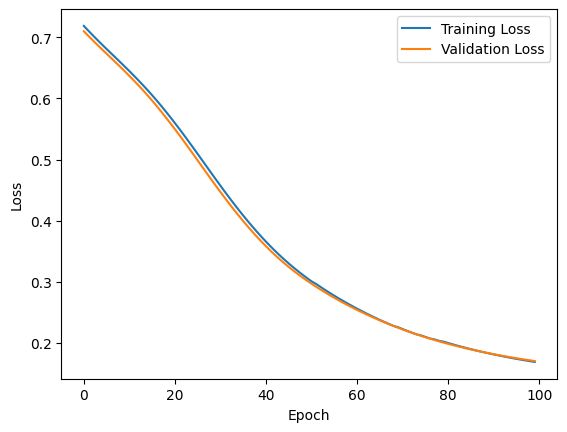

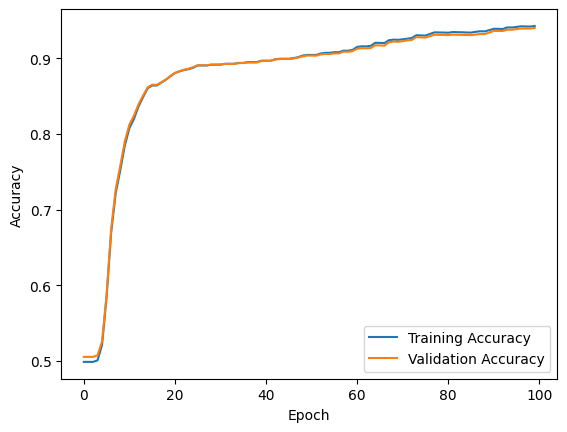

In [21]:

# Plot training loss and validation loss
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [22]:
# Evaluate the model
with torch.no_grad():
    model.eval()
    test_pred = model(torch.tensor(X_test, dtype=torch.float32)).round().detach().numpy()
    test_accuracy = accuracy_score(y_test, test_pred)
    print("Test Accuracy:", test_accuracy)
    cm = confusion_matrix(y_test, test_pred)
    print("Confusion Matrix:")
    print(cm)


Test Accuracy: 0.9402971951112283
Confusion Matrix:
[[11254   240]
 [ 1118 10134]]


**Conclusion**

### The neural network model demonstrated promising results in detecting credit card fraud, with both training and validation loss decreasing and training and validation accuracy increasing throughout the training process.

### this deep learning model's 100-epoch demonstrates significant learning and optimization.

### These results signify effective learning and generalization, with minimal overfitting.

### This deep learning model exhibits strong performance, underlining the importance of careful monitoring during training, and offers opportunities for further exploration in terms of interpretability and potential model enhancements.

### The model demonstrates robust performance in identifying fraudulent transactions, achieving a high accuracy rate of 94.03% on the test set. The accuracy and consistency between training and test losses suggest the model's capability in accurately distinguishing between fraudulent and non-fraudulent transactions. This ability is crucial in fraud detection, reducing the occurrence of false negatives and false positives.
